# Covid-19 Statistics Aachen: Datenvisualisierung

Einlesen der Kennzahlen aus dem Excel-Sheet, in dem die im vorherigen Schritt aufbereiteten Kennzahlen zwischengespeichert wurden. 

# Benötigte Imports und Vorbereitungen

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns;

import pandas as pd
import numpy as np

import configparser

# Konfiguration einlesen
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

# Vorverarbeitete Daten aus Excel-Datei einlesen

In [10]:
# Zwischenergebnisse aus Excel-Sheet einlesen
c19_cases = pd.read_excel(config['Kennzahlen']['FileName'], 
                          sheet_name=config['Kennzahlen']['SheetName'],
                          index_col=0,
                          parse_dates=[0])

c19_cases

,Summe,Summe Aachen,Summe Todesfälle,Summe genesen,Akute Fälle,Summe StädteRegion,Änderung Akute Fälle [%],Änderung Akute Fälle (geglättet) [%],Neuinfektionen,Neuinfektionen Aachen,Neue Todesfälle,Neue Genesene,Neuinfektionen (geglättet),Neue Todesfälle (geglättet),Neue Genesene (geglättet),Summe pro 100000,Summe Aachen pro 100000,Neuinfektionen 7T/100000 Aachen,Neuinfektionen 7T/100000
Datum,,,,,,,,,,,,,,,,,,,
2020-03-09,58,20,0,0,58,38,0.000000,NaN,0,0,0,0,NaN,NaN,NaN,10.441702,8.084728,NaN,NaN
2020-03-10,61,21,0,6,55,40,-5.172414,NaN,3,1,0,6,NaN,NaN,NaN,10.981790,8.488964,NaN,NaN
2020-03-11,63,22,0,6,63,41,14.545455,NaN,2,1,0,0,NaN,NaN,NaN,11.341849,8.893201,NaN,NaN
2020-03-12,70,25,0,6,70,45,11.111111,NaN,7,3,0,0,NaN,NaN,NaN,12.602054,10.105910,NaN,NaN
2020-03-13,85,34,0,27,58,51,-17.142857,NaN,15,9,0,21,NaN,NaN,NaN,15.302494,13.744038,NaN,NaN
2020-03-14,100,40,0,28,72,60,24.137931,NaN,15,6,0,1,NaN,NaN,NaN,18.002934,16.169456,NaN,NaN
2020-03-15,155,75,0,28,155,80,115.277778,20.393858,55,35,0,0,13.857143,0.000000,4.000000,27.904548,30.317730,22.233002,17.462846
2020-03-16,169,85,0,33,136,84,-12.258065,18.642706,14,10,0,5,15.857143,0.000000,4.714286,30.424959,34.360094,26.275366,19.983257
2020-03-17,211,100,2,33,209,111,53.676471,27.049689,42,15,2,0,21.428571,0.285714,3.857143,37.986192,40.423640,31.934675,27.004402


# Grafikausgabe konfigurieren

In [4]:
plt.style.use('seaborn-whitegrid')

fig_dpi = 300

fig_width = 10
fig_height = 6

# Erstes Diagramm
Daten für die Städteregion Aachen (nur dafür liegen alle benötigten Rohdaten vor).
- Eine X-Achse: Beschriftung mit Monaten oder Kalenderwochen?
- Zwei Y-Achsen:
    - Achse 1 (links): Prozentuale Änderung der aktiven Fälle
    - Achse 2 (rechts): Absolute Anzahl kummulierter Fälle
- Gestapelter Verlauf für Achse 2 (von unten nach oben):
    - Aktive Fälle
    - Summe genesen
    - Summe Todesfälle
- Verwendung `df.plot.area()`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html

DPI:  300
Height:  10.0
Width:  15.0


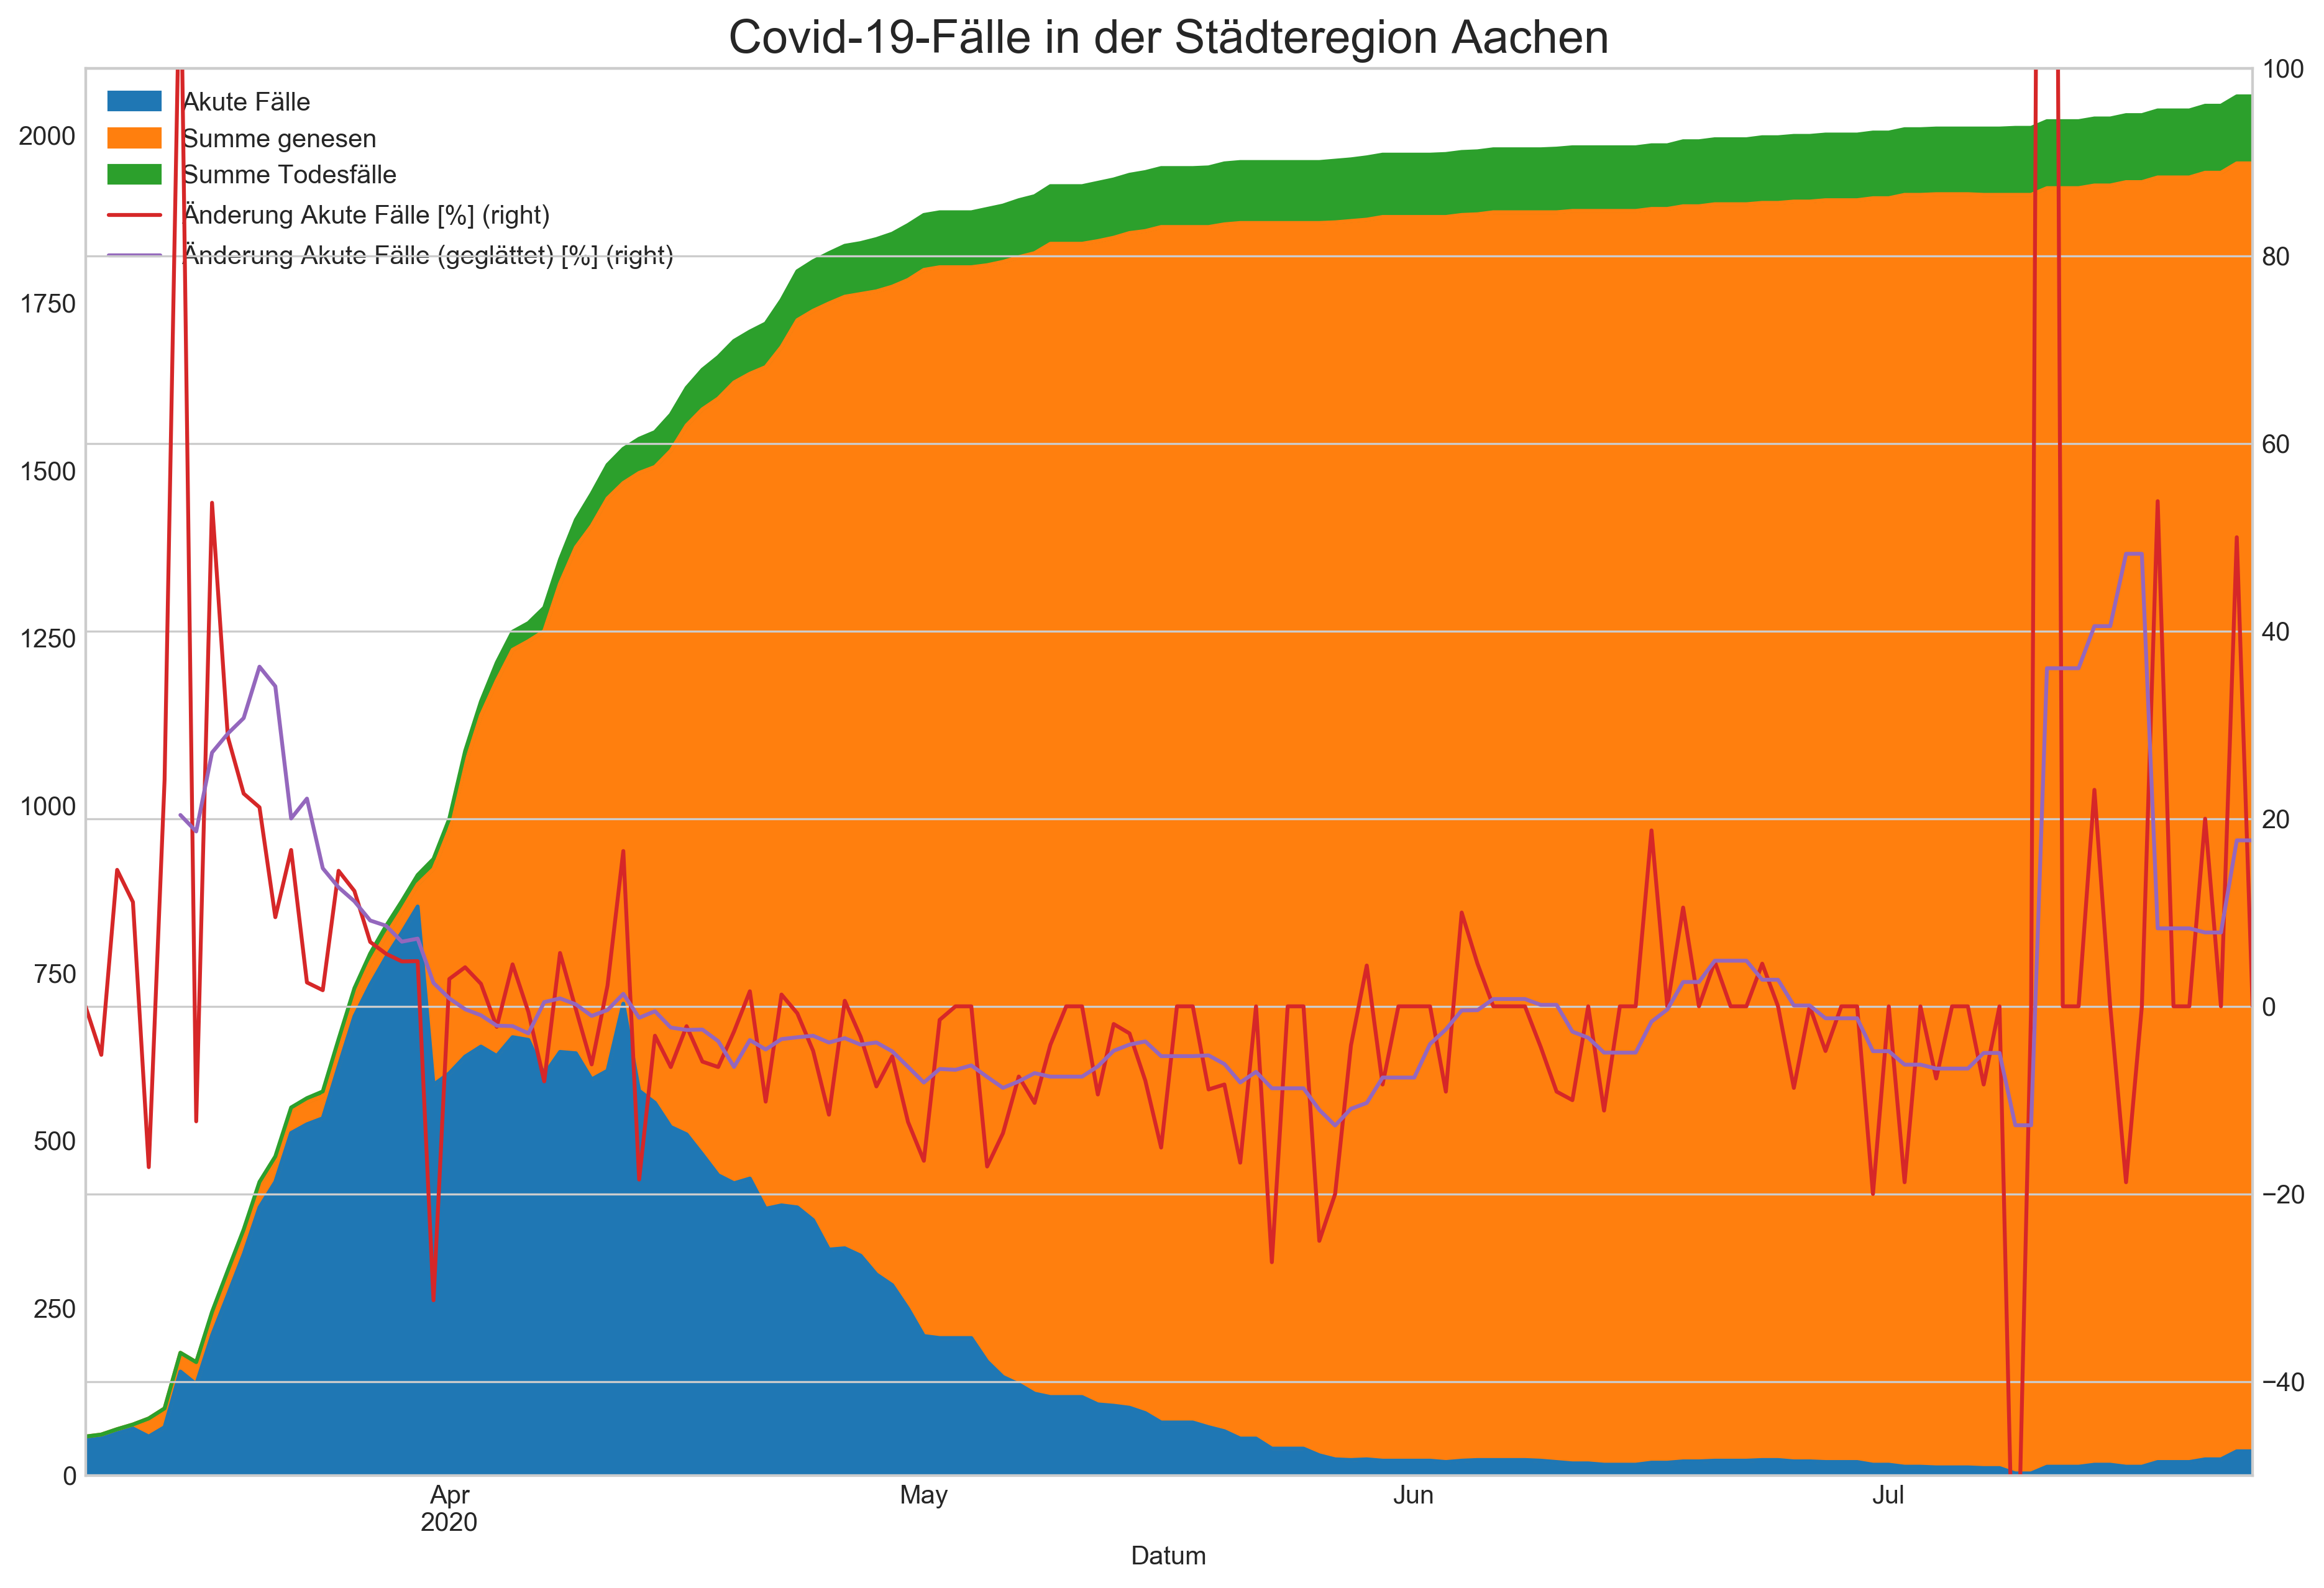

In [5]:
fig = plt.figure(figsize=(15, 10), dpi=fig_dpi)

axes = fig.add_subplot(1,1,1)

print('DPI: ', fig.dpi)
print('Height: ', fig.get_figheight())
print('Width: ', fig.get_figwidth())

axes.set_title('Covid-19-Fälle in der Städteregion Aachen', fontsize=18)

# 1. Achse
ymax = ((c19_cases['Akute Fälle'] + c19_cases['Summe genesen'] + c19_cases['Summe Todesfälle']).max() // 50 + 1) * 50  
ax1 = c19_cases[['Akute Fälle', 'Summe genesen', 'Summe Todesfälle']].plot.area(ax=axes, legend=True)
ax1.set_ylim(0, ymax)
ax1.set_xlim(c19_cases.index[0], c19_cases.index[-1])

# 2. Achse
ax2 = c19_cases[['Änderung Akute Fälle [%]', 'Änderung Akute Fälle (geglättet) [%]']].plot.line(ax=axes, legend=True, secondary_y=True)
ax2.set_ylim(-50,100)

fig.savefig('c19-diagram-1.jpg', dpi=fig_dpi)


# Zweites Diagramm

Daten für die Städteregion Aachen (nur dafür liegen alle benötigten Rohdaten vor). Es werden nur die über 7 Tage gemittelten Werte visualisiert; die tagesaktuellen Werte schwanken sehr stark und sind wenig aussagekräftig.
- Eine X-Achse: Beschriftung mit Monaten oder Kalenderwochen?
- Zwei Y-Achsen:
    - Achse 1 (links): Absolute Anzahl neuer Fälle und wieder Genesener
    - Achse 2 (rechts): Absolute Anzahl neuer Todesfälle

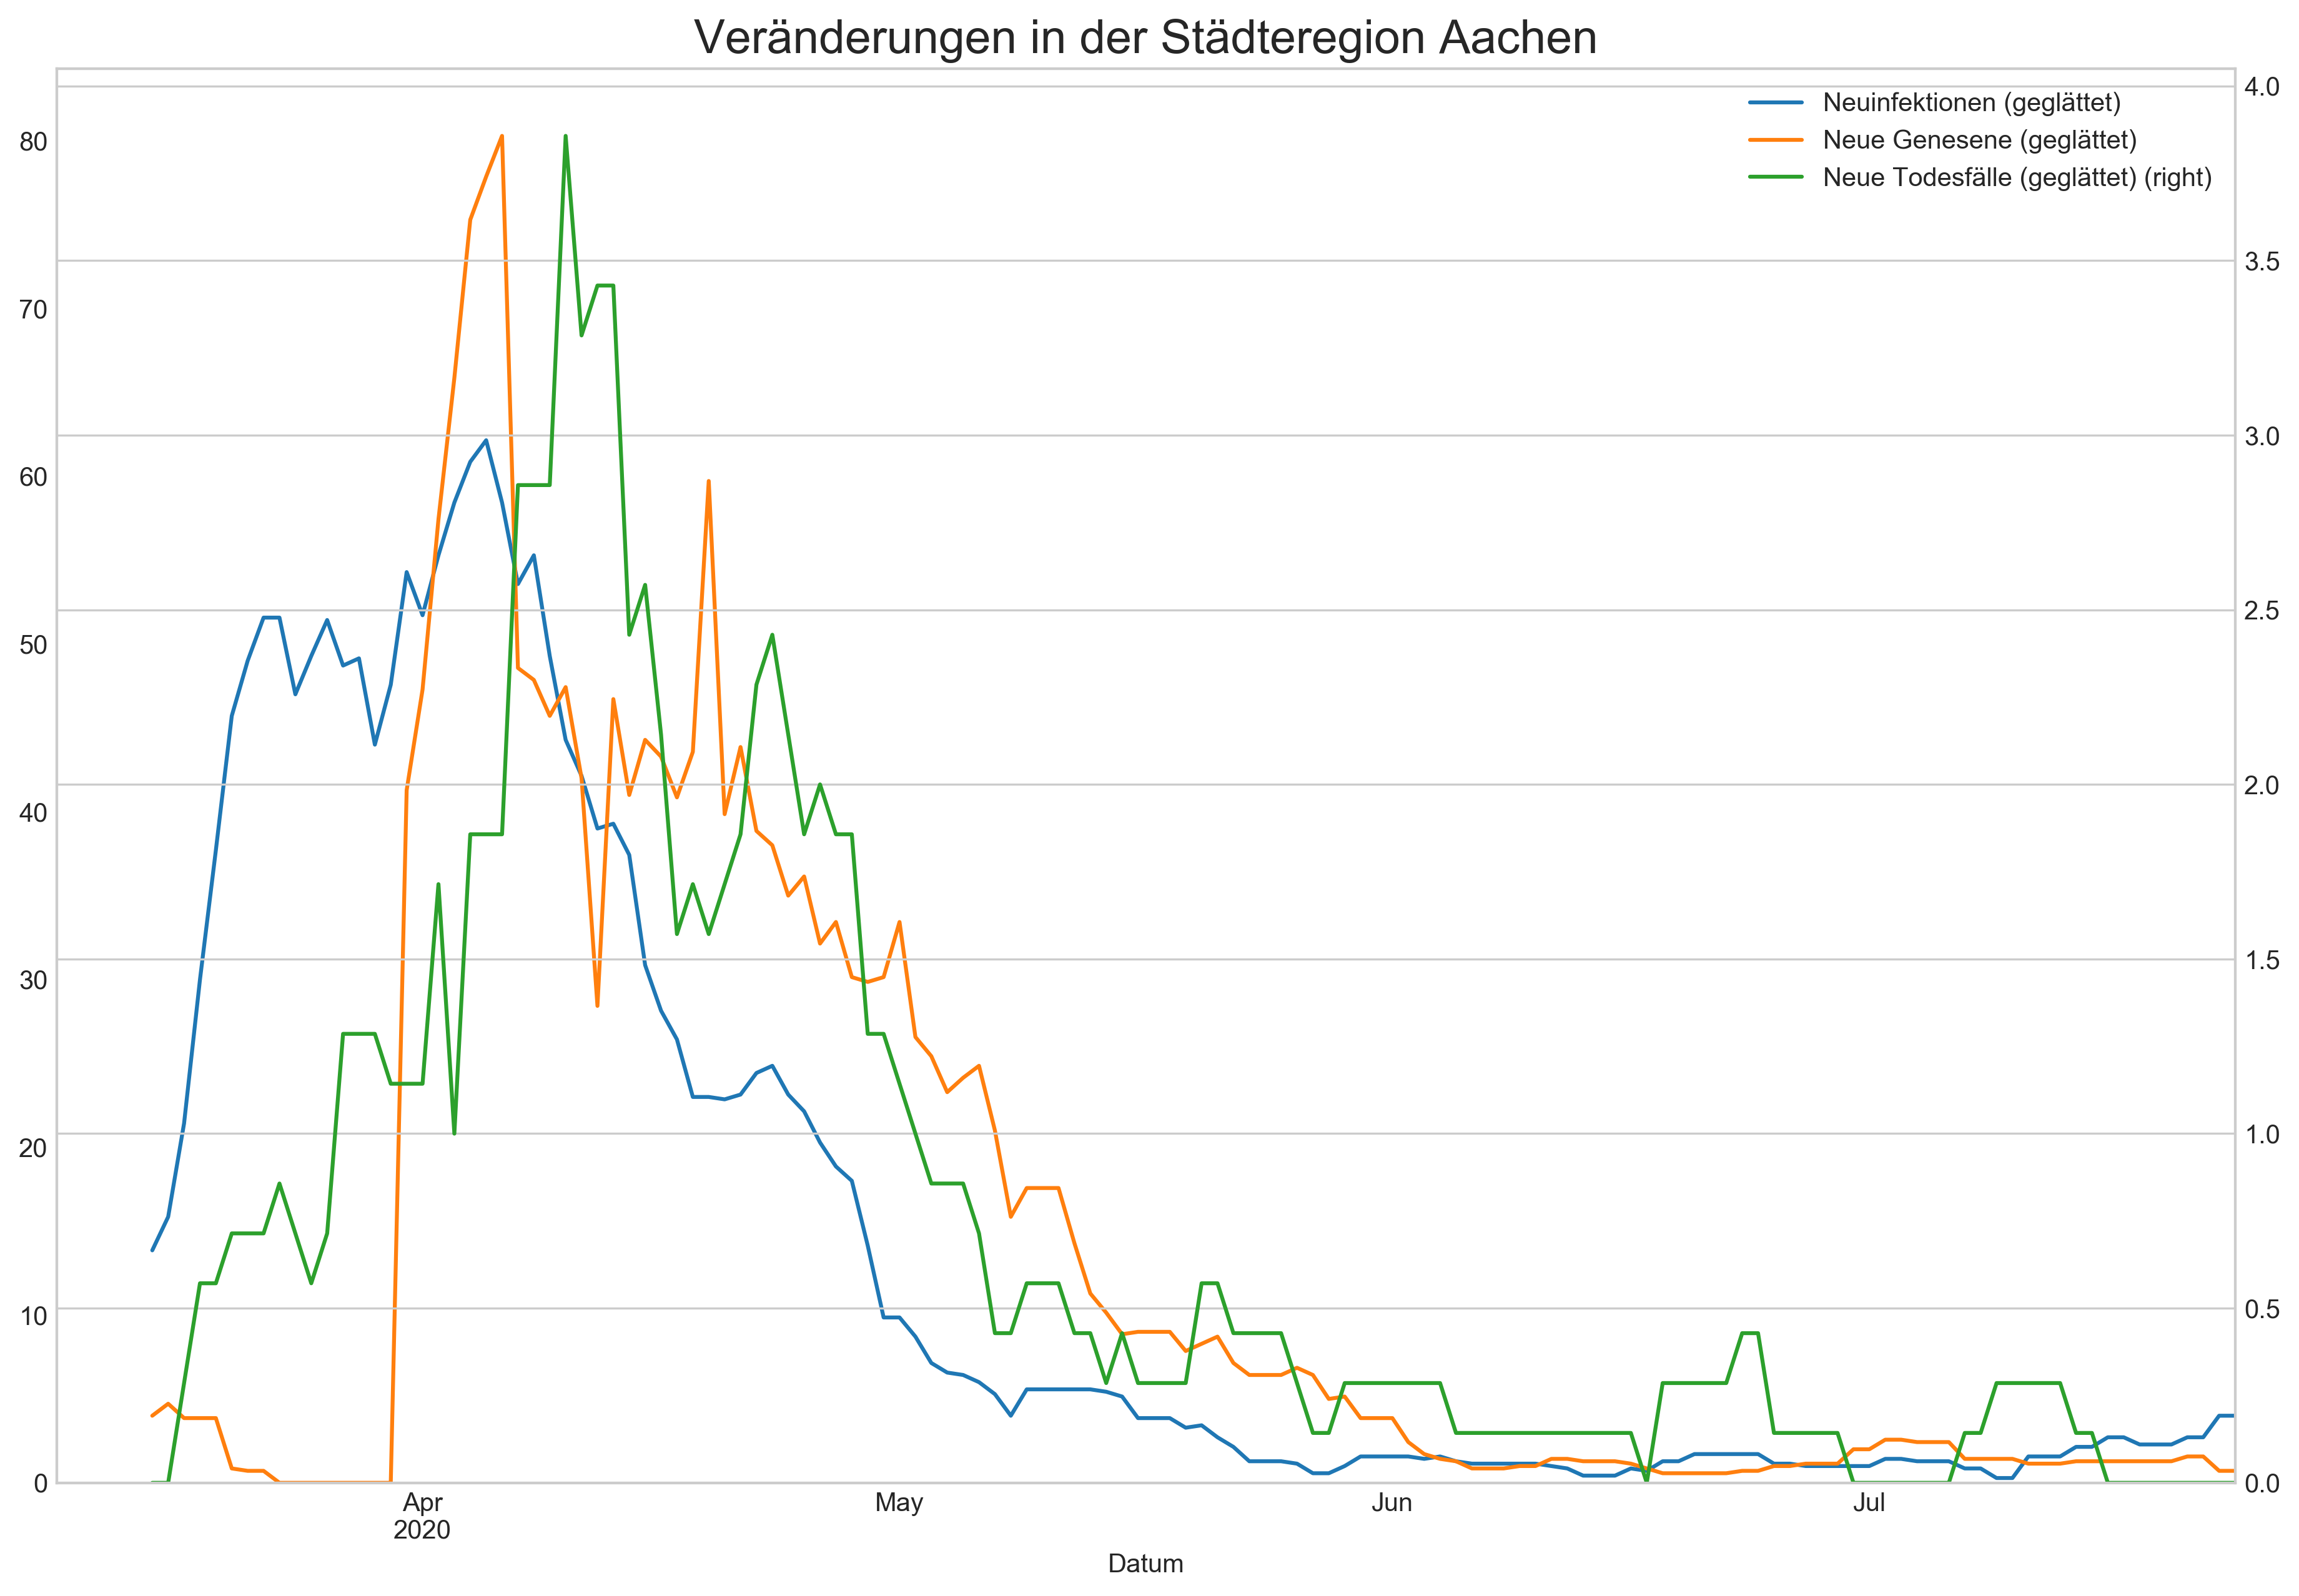

In [6]:
fig = plt.figure(figsize=(15, 10), dpi=fig_dpi)

axes = fig.add_subplot(1,1,1)

axes.set_title('Veränderungen in der Städteregion Aachen', fontsize=18)

# 1. Achse
ax1 = c19_cases[['Neuinfektionen (geglättet)', 'Neue Genesene (geglättet)']].plot.line(ax=axes)
ax1.set_ylim(0,)
ax1.set_xlim(c19_cases.index[0], c19_cases.index[-1])

# 2. Achse
ax2 = c19_cases[['Neue Todesfälle (geglättet)']].plot.line(ax=axes, secondary_y=True)
ax2.set_ylim(0,)

fig.savefig('c19-diagram-2.jpg', dpi=fig_dpi)

# Drittes Diagramm
Daten für die Städteregion und Stadt Aachen. 
- Eine X-Achse: Beschriftung mit Monaten oder Kalenderwochen?
- Eine Y-Achse: XXX

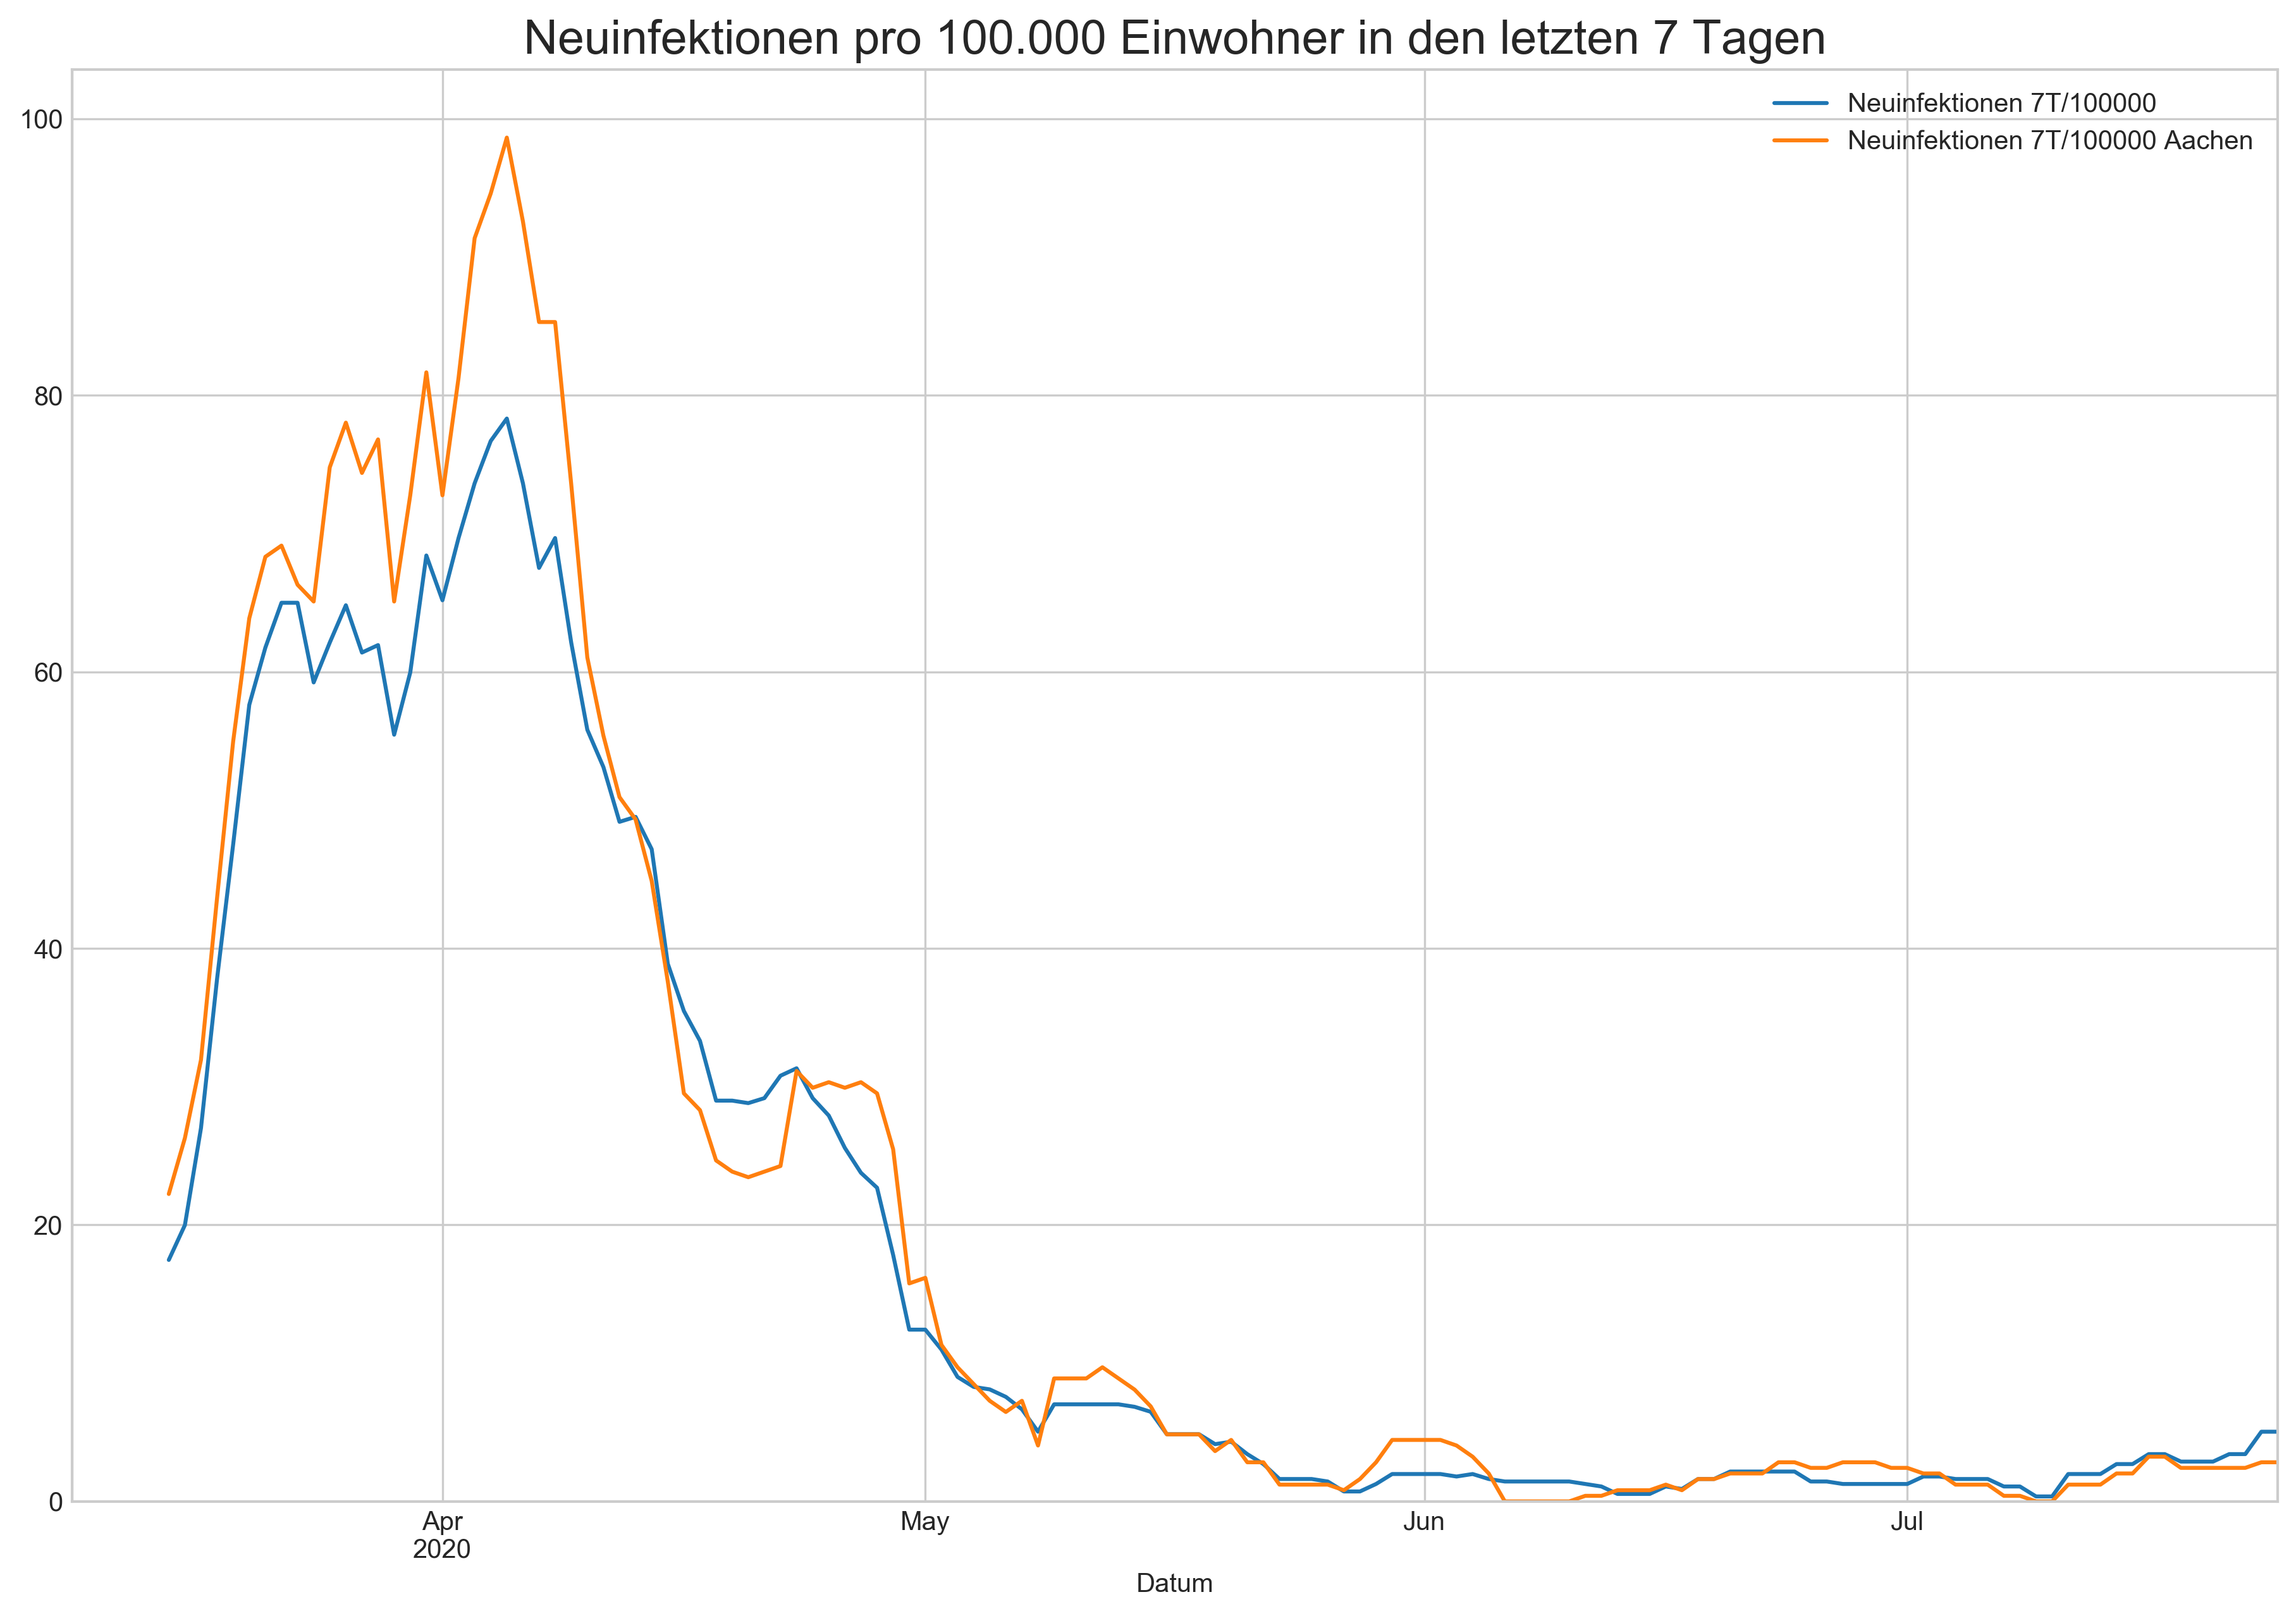

In [7]:
fig = plt.figure(figsize=(15, 10), dpi=fig_dpi)

axes = fig.add_subplot(1,1,1)

axes.set_title('Neuinfektionen pro 100.000 Einwohner in den letzten 7 Tagen', fontsize=18)

# 1. Achse
ax1 = c19_cases[['Neuinfektionen 7T/100000', 'Neuinfektionen 7T/100000 Aachen']].plot.line(ax=axes)
ax1.set_ylim(0,)
ax1.set_xlim(c19_cases.index[0], c19_cases.index[-1])

fig.savefig('c19-diagram-3.jpg', dpi=fig_dpi)